<a href="https://colab.research.google.com/github/biku1998/Applied_Stats/blob/master/Applied_Stats_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Notebook Use :
####  In this notebook i will do applied statistics on heart dataset from kaggle. I will try to apply different concepts of Stats directly to data and get some visuals.

In [0]:
# getting the data
!wget https://raw.githubusercontent.com/biku1998/Plotly-Practice/master/Data/heart.csv

--2020-01-30 05:19:44--  https://raw.githubusercontent.com/biku1998/Plotly-Practice/master/Data/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  11.06K  --.-KB/s    in 0s      

2020-01-30 05:19:44 (149 MB/s) - ‘heart.csv’ saved [11328/11328]



In [0]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [0]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Some data info 

* age : age in years
* sex : (1 = male; 0 = female)
* cp  : chest pain type
* trestbps : resting blood pressure (in mm Hg on admission to the hospital)
* chol : serum cholestoral in mg/dl
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg : resting electrocardiographic results
* thalach : maximum heart rate achieved
* exang : exercise induced angina (1 = yes; 0 = no)
* oldpeak : ST depression induced by exercise relative to rest
* slope : the slope of the peak exercise ST segment
* ca : number of major vessels (0-3) colored by flourosopy
* thal : 3 = normal; 6 = fixed defect; 7 = reversable defect
* target : 1(heart-disease) or 0(no-heart-disease) 




In [0]:
# check for missing data and data balance
print(df.isna().sum())
print(df['target'].value_counts())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
1    165
0    138
Name: target, dtype: int64


**No missing values and dataset is mostly called balanced.**

### Univariate Analysis using pdf and histograms

**The question we will try to answer is Which of my feature is more important?**

*Rule of thumb : The farther the distributions are -> the useful that feature is for classification*

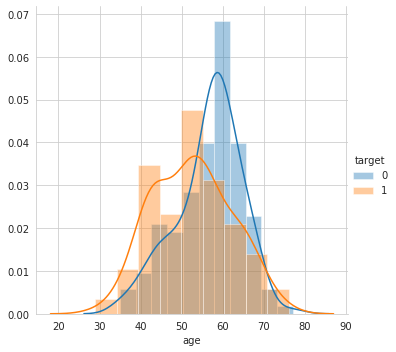

In [0]:
sns.set_style('whitegrid')
sns.FacetGrid(data = df,hue = 'target',height = 5).map(sns.distplot,'age').add_legend()
plt.show()

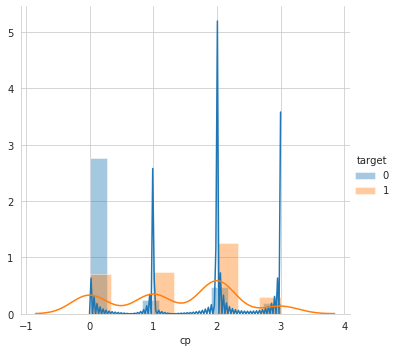

In [0]:
sns.set_style('whitegrid')
sns.FacetGrid(data = df,hue = 'target',height = 5).map(sns.distplot,'cp').add_legend()
plt.show()

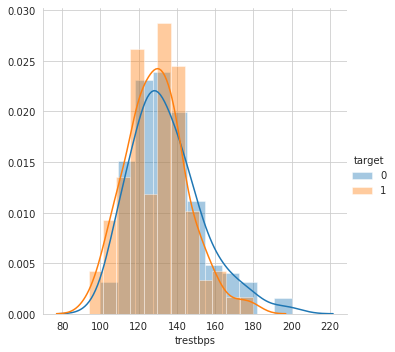

In [0]:
sns.set_style('whitegrid')
sns.FacetGrid(data = df,hue = 'target',height = 5).map(sns.distplot,'trestbps').add_legend()
plt.show()

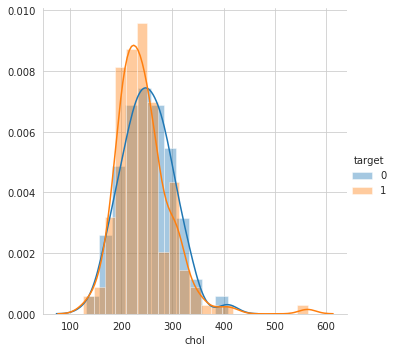

In [0]:
sns.set_style('whitegrid')
sns.FacetGrid(data = df,hue = 'target',height = 5).map(sns.distplot,'chol').add_legend()
plt.show()

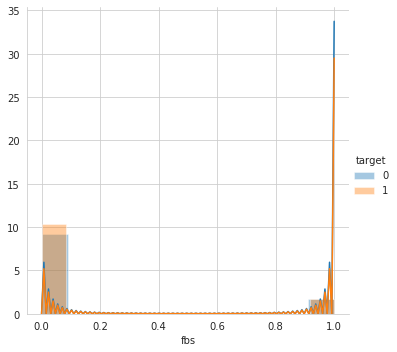

In [0]:
sns.set_style('whitegrid')
sns.FacetGrid(data = df,hue = 'target',height = 5).map(sns.distplot,'fbs').add_legend()
plt.show()

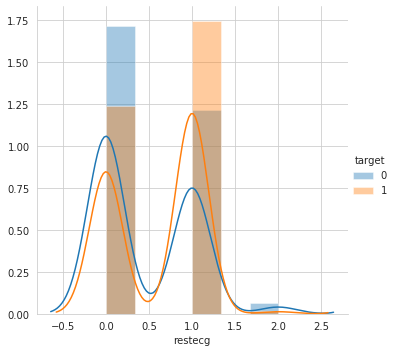

In [0]:
sns.set_style('whitegrid')
sns.FacetGrid(data = df,hue = 'target',height = 5).map(sns.distplot,'restecg').add_legend()
plt.show()

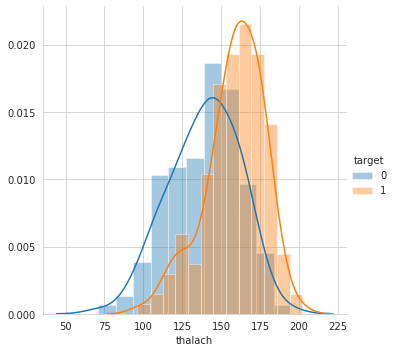

In [0]:
sns.set_style('whitegrid')
sns.FacetGrid(data = df,hue = 'target',height = 5).map(sns.distplot,'thalach').add_legend()
plt.show()

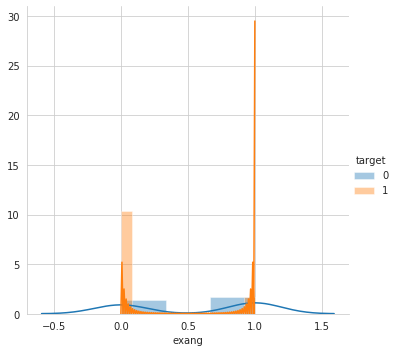

In [0]:
sns.set_style('whitegrid')
sns.FacetGrid(data = df,hue = 'target',height = 5).map(sns.distplot,'exang').add_legend()
plt.show()

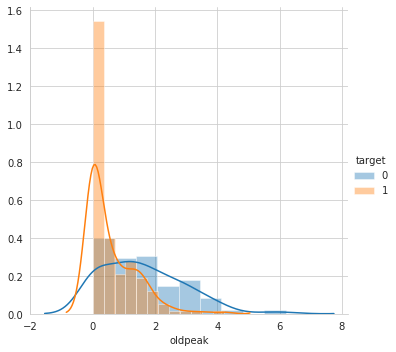

In [0]:
sns.set_style('whitegrid')
sns.FacetGrid(data = df,hue = 'target',height = 5).map(sns.distplot,'oldpeak').add_legend()
plt.show()

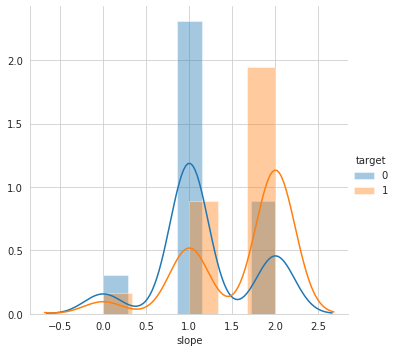

In [0]:
sns.set_style('whitegrid')
sns.FacetGrid(data = df,hue = 'target',height = 5).map(sns.distplot,'slope').add_legend()
plt.show()

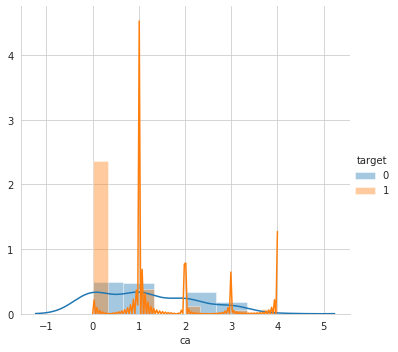

In [0]:
sns.set_style('whitegrid')
sns.FacetGrid(data = df,hue = 'target',height = 5).map(sns.distplot,'ca').add_legend()
plt.show()

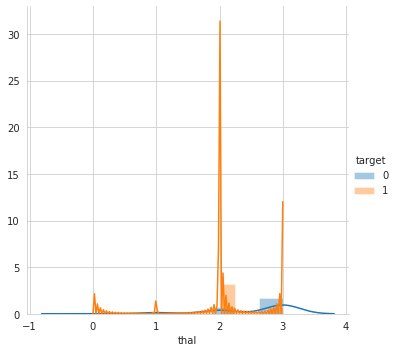

In [0]:
sns.set_style('whitegrid')
sns.FacetGrid(data = df,hue = 'target',height = 5).map(sns.distplot,'thal').add_legend()
plt.show()

**Observation : thalac i.e. maximum heart rate achieved seems to be better than others**

**What if we have to choose any 2 features ?** 
* In this case we can see which 2 features are most important for our classification, we can draw pair-plot, but if our features are more than 10 or even 7 or 8. It's very difficult to built pair plots. Let's see if we can see some interesting facts when use pair plot.**

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


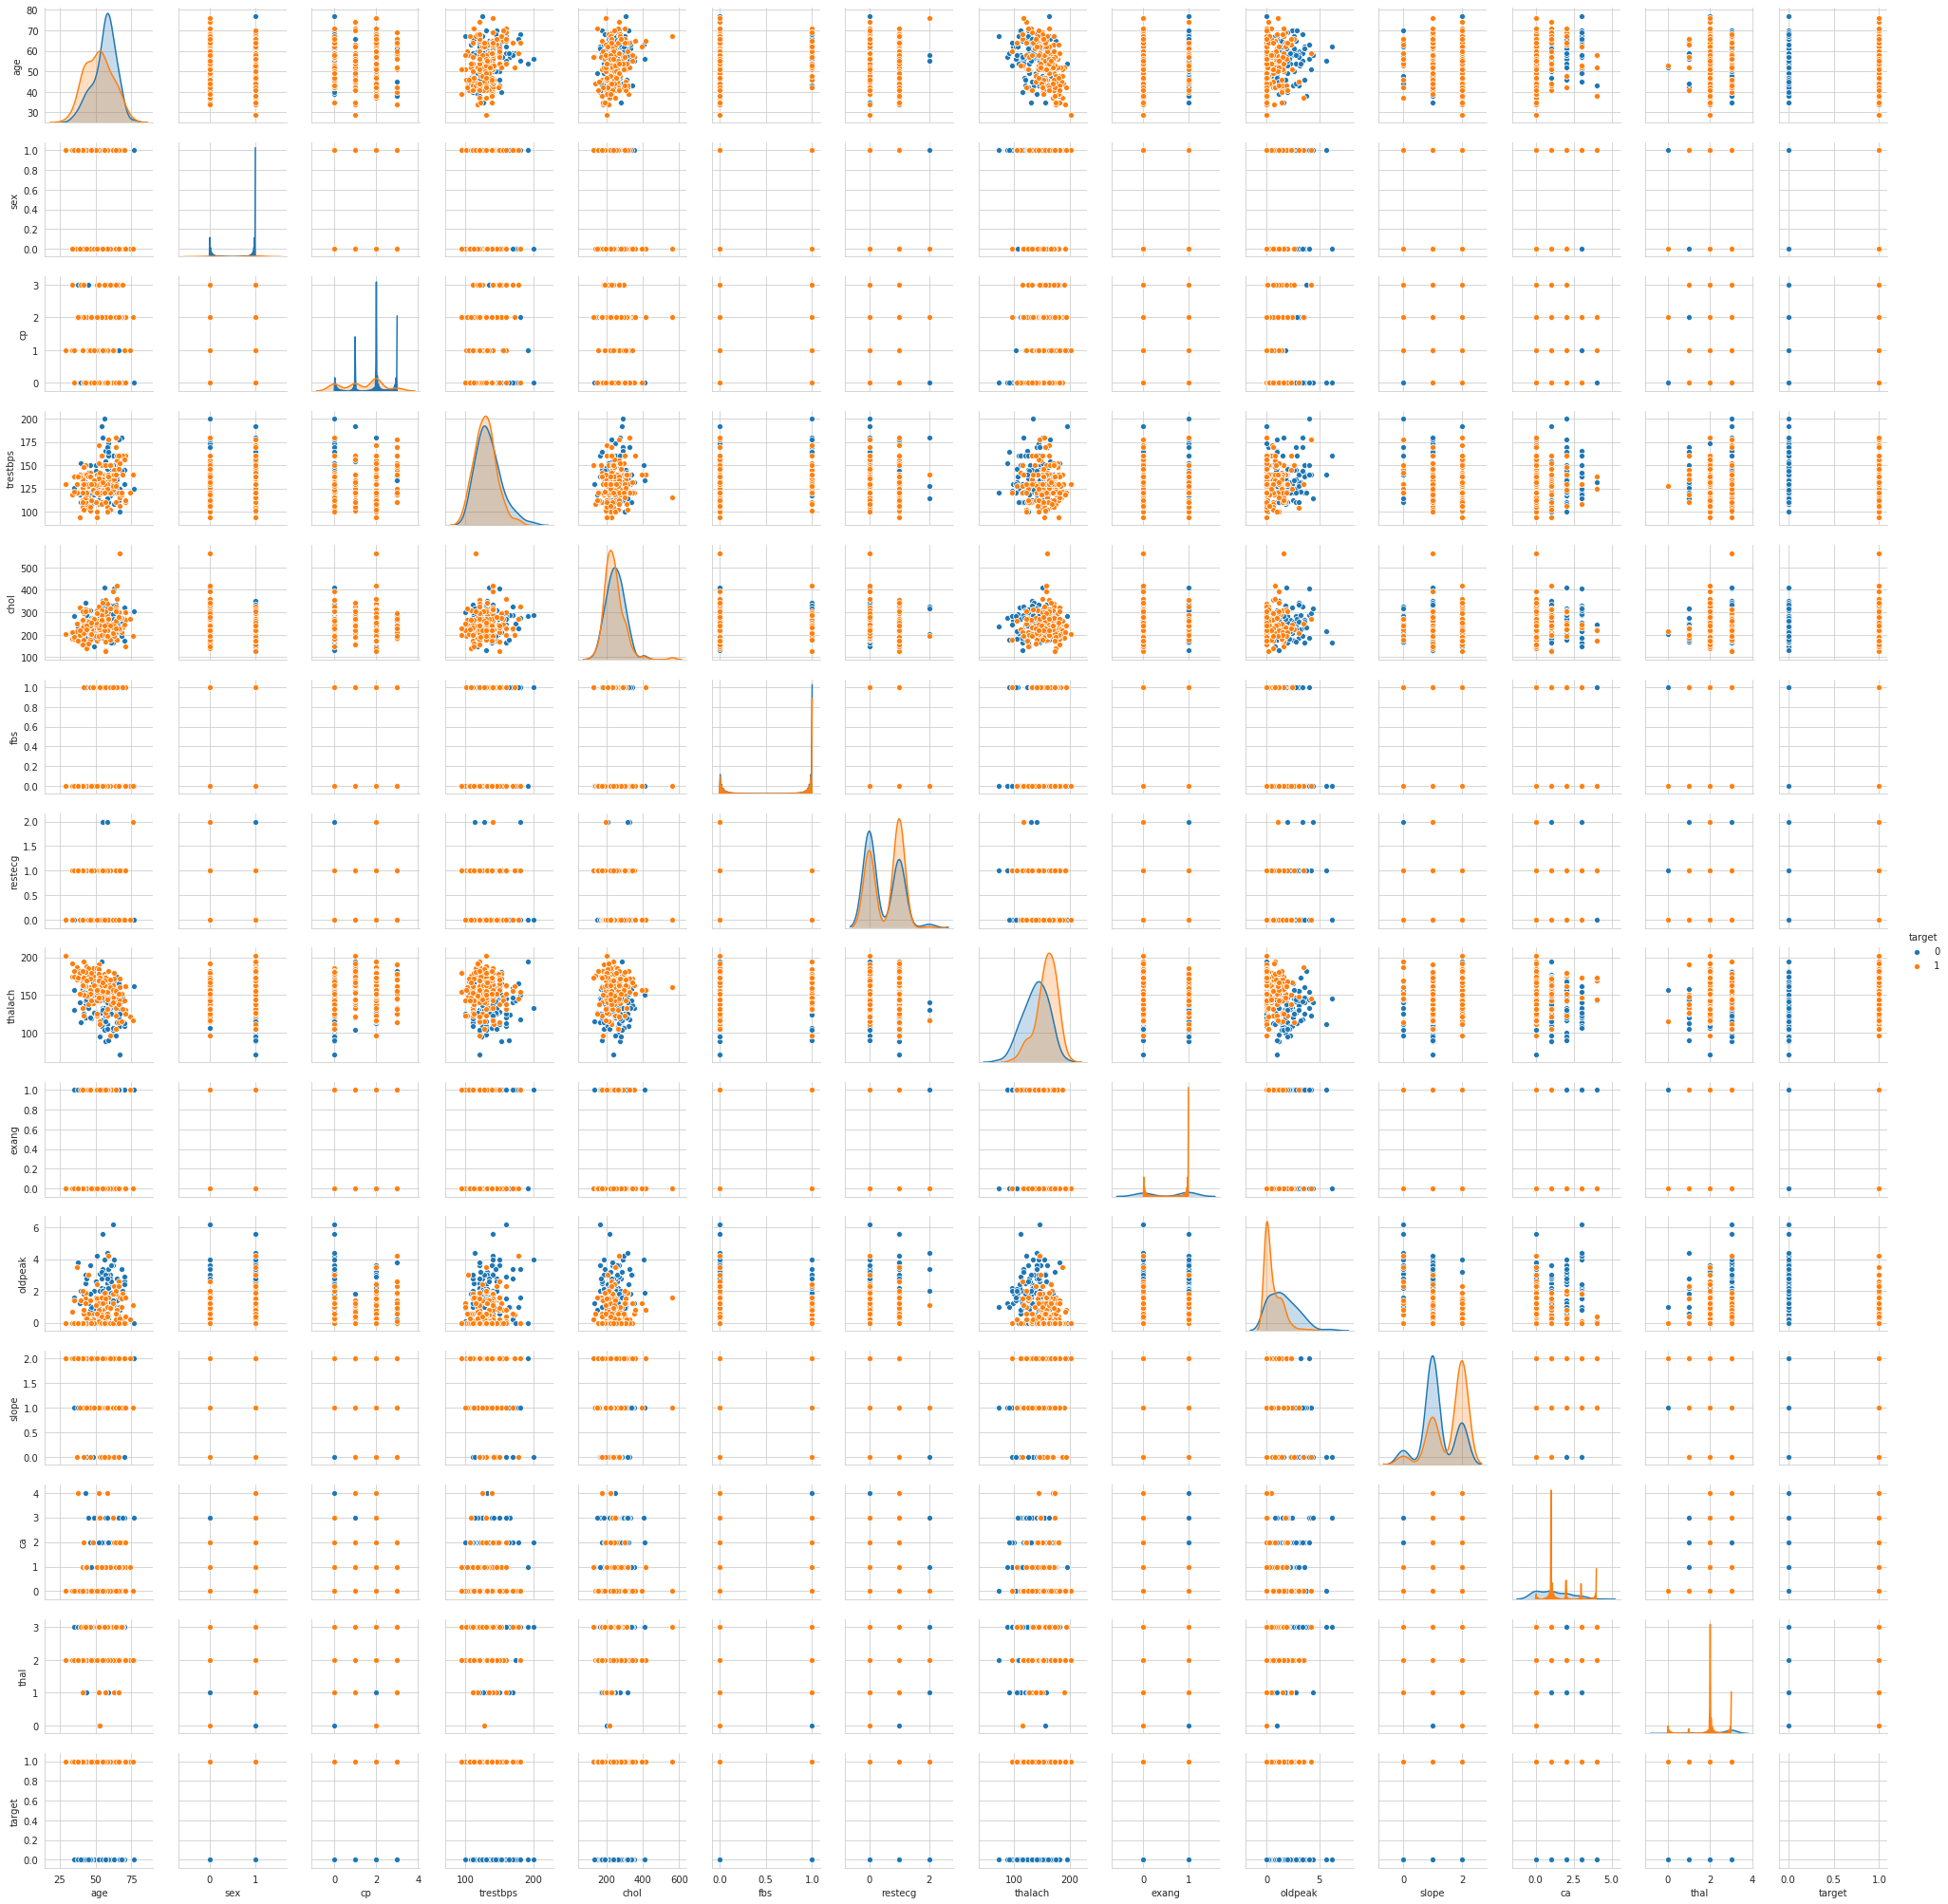

In [0]:
sns.pairplot(data = df,hue = 'target',height=2)
plt.show()

**Observations : if i have to pick one pair it would be thalach(max heart rate achieved) and oldpeak(ST depression induced by exercise relative to res)**

**PDF(probablity density function) and CDF(Cumulative distribution function)**

* PDF : The PDF is used to specify the probability of the random variable falling within a particular range of values, as opposed to taking on any one value. Why a range of values not a particular ? because the absolute likelihood for a continuous random variable to take on any particular value is 0 (since there are an infinite set of possible values to begin with)

**How to build a pdf : by building histograms and smothing it up**

* CDF : This is simply the probability upto a particular value of the random variable, say x. Generally denoted by F, F= P (X<=x) for any value of x in the X space.
 
**How to build a cdf ?**
1. For any value x on the x axis the corresponding value y can be calculated by cumulative sum of pdf upto that point.
2. If you have pdf, the corresponding value of the cdf is basically the area under the curve of your pdf till that point.

**Fact** : 
* if we take Derivative of CDF we get PDF.
* if we integrate PDF we get CDF.

**How to read pdf and cdf ?**
* PDF : https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library/random-variables-continuous/v/probability-density-functions

* CDF : http://nitro.biosci.arizona.edu/ftdna/plot.html

**Let's try to plot pdf and cdf for a given feature from the dataset**

In [0]:
def plot_pdf_cdf(df,feature):
    """
    This functionn will plot pdf and cdf curve for a given feature in a dataFrame
    """
    # compute histogram for the sample
    counts,bin_edges = np.histogram(df[feature],bins = 10,density=True)
    pdf = counts/(sum(counts))
    print(pdf)
    print(bin_edges)

    # compute cdf
    cdf = np.cumsum(pdf)
    """
    **** From doc
    bin_edges : array of dtype float
    Return the bin edges (length(hist)+1).
    """
    # lets plot both of them
    plt.plot(bin_edges[1:],pdf,label = 'PDF') #  why [1:] ? see ****
    plt.plot(bin_edges[1:],cdf,label = 'CDF')
    plt.legend()
    plt.xlabel(feature)
    plt.ylabel('probablity')
    plt.title(f'pdf and cdf curve for {feature}')
    plt.show()

**Let's plot pdf and cdf of some continuous variables present in our dataset**

*we will plot pdf and cdf for all continuous variables present in our dataset for the 2 classes i.e 0 and 1 to observe some patterns*

In [0]:
# seprating our classes

df_zero = df[df['target'] == 0]
             
df_one = df[df['target'] == 1]

[0.00724638 0.02173913 0.07246377 0.11594203 0.18115942 0.20289855
 0.15942029 0.17391304 0.05797101 0.00724638]
[ 71.   83.4  95.8 108.2 120.6 133.  145.4 157.8 170.2 182.6 195. ]


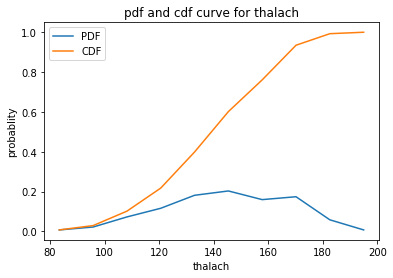

[0.01212121 0.03030303 0.04848485 0.04848485 0.10909091 0.20606061
 0.24848485 0.20606061 0.07272727 0.01818182]
[ 96.  106.6 117.2 127.8 138.4 149.  159.6 170.2 180.8 191.4 202. ]


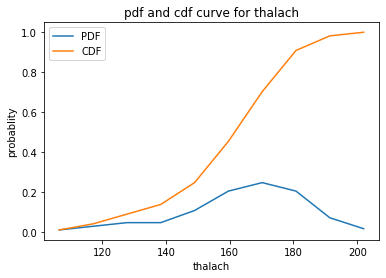

In [0]:
plot_pdf_cdf(df_zero,'thalach')
plot_pdf_cdf(df_one,'thalach')

Observations : a little bit difference in thalach reading for both classes

[0.02898551 0.13768116 0.25362319 0.19565217 0.17391304 0.08695652
 0.05797101 0.03623188 0.01449275 0.01449275]
[100. 110. 120. 130. 140. 150. 160. 170. 180. 190. 200.]


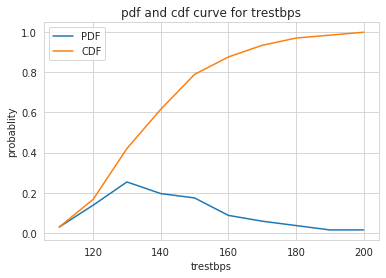

[0.04242424 0.1030303  0.07878788 0.23636364 0.21212121 0.18181818
 0.07878788 0.04242424 0.00606061 0.01818182]
[ 94.  102.6 111.2 119.8 128.4 137.  145.6 154.2 162.8 171.4 180. ]


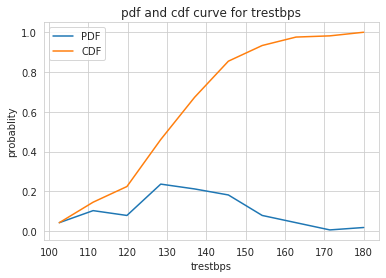

In [0]:
plot_pdf_cdf(df_zero,'trestbps')
plot_pdf_cdf(df_one,'trestbps')

Observation : for non heart patients i.e. class 0, 90 % of them has trestbps <= 165. But in heart patients i.e. class 1, 90 % of them has trestbps <= 150.

[0.01449275 0.07971014 0.14492754 0.19565217 0.2173913  0.17391304
 0.10144928 0.05797101 0.         0.01449275]
[131.  158.8 186.6 214.4 242.2 270.  297.8 325.6 353.4 381.2 409. ]


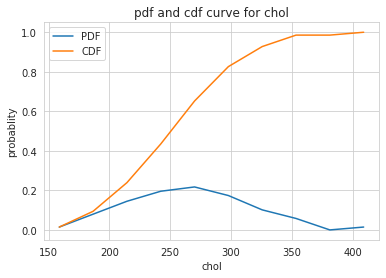

[0.03636364 0.27878788 0.36969697 0.17575758 0.10909091 0.01212121
 0.01212121 0.         0.         0.00606061]
[126.  169.8 213.6 257.4 301.2 345.  388.8 432.6 476.4 520.2 564. ]


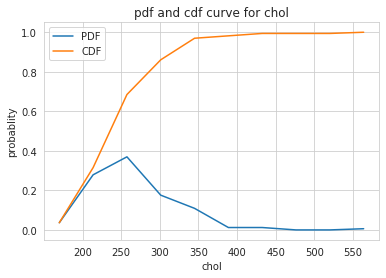

In [0]:
plot_pdf_cdf(df_zero,'chol')
plot_pdf_cdf(df_one,'chol')

observation : very minor difference in chol reading for both the classes

[0.27536232 0.20289855 0.13768116 0.12318841 0.13043478 0.07246377
 0.03623188 0.00724638 0.         0.01449275]
[0.   0.62 1.24 1.86 2.48 3.1  3.72 4.34 4.96 5.58 6.2 ]


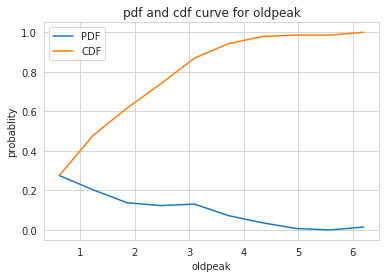

[0.58787879 0.13333333 0.08484848 0.10909091 0.04242424 0.01818182
 0.00606061 0.00606061 0.00606061 0.00606061]
[0.   0.42 0.84 1.26 1.68 2.1  2.52 2.94 3.36 3.78 4.2 ]


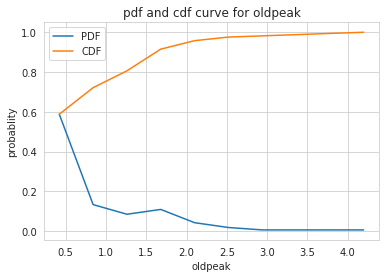

In [0]:
plot_pdf_cdf(df_zero,'oldpeak')
plot_pdf_cdf(df_one,'oldpeak')

Observation : In class 0 has 90 % of them has oldpeak <= 3.5 and in class 1 90 % of them has oldpeak <= 1.7

**Mean,variance and standard deviation**

* Mean : It's a measure of central tendency, the avg value of all the observaions. Mean can be corrupted easily with an outlier. 
$$notation = \mu $$

$$\mu = \frac{1}{N}\sum_{n=1}^{N}{xi}$$

* Variance : It's a measure of spread from central tendency, i.e mean. why knowing spread of data is useful ? Because if we know the spread is small, i know most of my points are around mean

**variance is nothing but avg square distance of each point from the mean**

$$variance = \frac{1}{N}\sum_{n=1}^{N}{(xi-\mu)^2}$$

* STD : Standard deviation is nothing but square root of variance
**std - what is the avg deviation of points from the mean value. And if the std is small we know that spread is small**
$$std = \sqrt{\frac{1}{N}\sum_{n=1}^{N}{(xi-\mu)^2}}$$





In [0]:
# mean

print('mean class 0 for thalach :',df_zero['thalach'].mean())
print('mean class 1 for thalach :',df_one['thalach'].mean())
print()
# adding an outlier to class 0 and 1
print('mean class 0 for thalach with an outlier :',np.mean(np.append(df_zero['thalach'],1200)))
print('mean class 1 for thalach with an outlier :',np.mean(np.append(df_one['thalach'],1200)))
print()
# std

print('std class 0 for thalach :',df_zero['thalach'].std())
print('std class 1 for thalach :',df_one['thalach'].std())
print()


mean class 0 for thalach : 139.1014492753623
mean class 1 for thalach : 158.46666666666667

mean class 0 for thalach with an outlier : 146.73381294964028
mean class 1 for thalach with an outlier : 164.74096385542168

std class 0 for thalach : 22.598782298785903
std class 1 for thalach : 19.174275619393168



**Observations :** By just looking at mean and std we can come up with simple points about our data.

* we can see that spread of our attribute thalach of class 0 is 19 which means a good no of points i.e thalach is between
  (mean(thalach) -19 ,mean(thalach), mean(thalach) + 19) 

* we can see that spread of our attribute thalach of class 1 is 22 which means a good no of points i.e thalach is between
  (mean(thalach) -22 ,mean(thalach), mean(thalach) + 22)


**The problem with mean, variance and std is that 1 outlier can corrupt all of them**

**we know there are problems for mean, var and std. So is there any equivalent for them that doen't have such problems ?**

**Median**
* yes for mean we have median(also a measure of central tendency) which does not get corrupted with an outlier.
To calculate median we first sort the data, and then pick a middle value.

**Percentiles and Quantiles**
* Percentile : It basically says, where do you lie in sorted list i.e rank of an element in a sorted list. So if total no of values is 100 then value at 50th position is 50th percentile value. 
And the 50th percentile is also our median. Similarly what is the 10th percentile ? It's nothing but value at 10th position in the sorted array.It tell us about 10 % percent of points are roughly less than this value and 90 % of points are more than this value.

**And the 25th, 50th, 75th and 100th percentiles are called Quantiles. Which means 25th per ~ 1st quantile and ... 100th per ~ 4th quantile**

In [0]:
# median
print('median class 0 for thalach :',df_zero['thalach'].median())
print('median class 1 for thalach :',df_one['thalach'].median())
print()
# adding an outlier to class 0 and 1
print('median class 0 for thalach with an outlier :',np.median(np.append(df_zero['thalach'],1200)))
print('median class 1 for thalach with an outlier :',np.median(np.append(df_one['thalach'],1200)))
print()

# Quantiles
print('Quantiles [0th percentile, 25th percentile, 50th percentile, 75th percentile]\n')
print('Quantiles of thalach of class = 0 : ',np.percentile(df_zero['thalach'],np.arange(0,100,25)))
print('Quantiles of thalach of class = 1 : ',np.percentile(df_one['thalach'],np.arange(0,100,25)))



median class 0 for thalach : 142.0
median class 1 for thalach : 161.0

median class 0 for thalach with an outlier : 142.0
median class 1 for thalach with an outlier : 161.5

Quantiles [0th percentile, 25th percentile, 50th percentile, 75th percentile]

Quantiles of thalach of class = 0 :  [ 71. 125. 142. 156.]
Quantiles of thalach of class = 1 :  [ 96. 149. 161. 172.]


**Median absolute deviation** which has the same notion as standard deviation

Median absolute deviation = $$median(|xi-median|)_{i=1}^{n}$$

Median absolute deviation also measures the deviation from central tendency i.e. median here like std  does with(median)

In [0]:
from statsmodels import robust
# median absolute deviation 
print('median absolute deviation  class 0 for thalach :',robust.mad(df_zero['thalach']))
print('median absolute deviation  class 1 for thalach :',robust.mad(df_one['thalach']))
print('## compare the above with std that we calculated ... ##')

median absolute deviation  class 0 for thalach : 23.721635496089633
median absolute deviation  class 1 for thalach : 16.30862440356162
## compare the above with std that we calculated ... ##


So to summarise : 
* mean ~ median
* std ~ median absolute deviation

* IQR - Inter Quatile range. we get this by taking differece of 75th and 25th percentile. It's used to determine that 50 percent of our data lies in this short range.


### But how do we plot these percentiles ? -> Using box plots and whiskers

**Let's plot some box plots for our features**

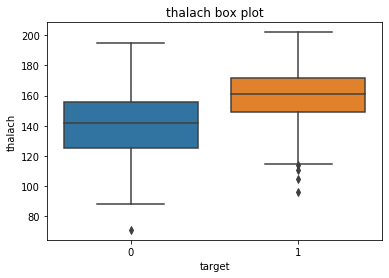

In [0]:
# box plot
col = 'thalach'
sns.boxplot(x='target',y=col,data = df)
plt.title(f'{col} box plot')
plt.show()

**How to read box plots ?**

* The x-axis is targets, y-axis is any one feature from the dataset here thalach.
* Take the blue box (for people who don't have heart problem): the middle line is the 50th percentile, upper line is 75th percentile and below line is 25th percentile.
Remember the widht of a box plot has no significance.
The lines below and above the blue box are called whiskers, one way to draw whiskers is to take min and max value.



In [0]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

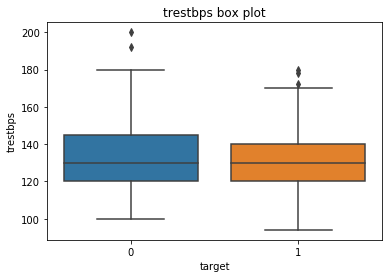

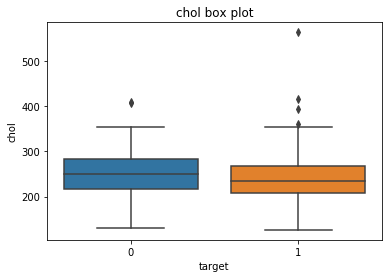

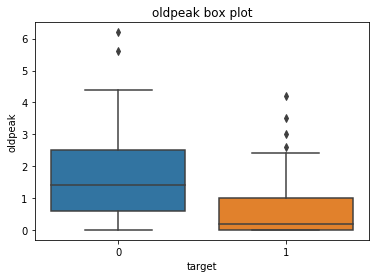

In [0]:
# box plot
col = 'trestbps'
sns.boxplot(x='target',y=col,data = df)
plt.title(f'{col} box plot')
plt.show()

# box plot
col = 'chol'
sns.boxplot(x='target',y=col,data = df)
plt.title(f'{col} box plot')
plt.show()

# box plot
col = 'oldpeak'
sns.boxplot(x='target',y=col,data = df)
plt.title(f'{col} box plot')
plt.show()

**Violin plot :** It's a combination of pdf's, histogram and box plots

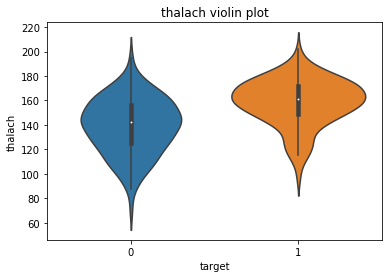

In [0]:
col = 'thalach'
sns.violinplot(x='target',y = col,data = df)
plt.title(f'{col} violin plot')
plt.show()

**How to read box-plots ?** 

Take the blue violin. The structure in the middle is nothing but our box plot with whiskers as end of line. The side part is pdf curve.

**Multivariate Analysis :**

Can we look at more than 2 features at same time? 

3D Density plot : contour plots (For Fun)

In [0]:
feature_1 = 'thalach'
feature_2 = 'oldpeak'
feature_3 = 'chol'
fig = go.Figure()
fig.add_trace(go.Mesh3d(x=df_zero[feature_1],
                   y=df_zero[feature_2],
                   z=df_zero[feature_3],
                   opacity=0.7,
                   color='pink'
                  ))


fig.update_layout(scene = dict(
                    xaxis_title=feature_1,
                    yaxis_title=feature_2,
                    zaxis_title=feature_3),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

In [0]:
feature_1 = 'thalach'
feature_2 = 'oldpeak'
feature_3 = 'chol'
fig = go.Figure()
fig.add_trace(go.Mesh3d(x=df_one[feature_1],
                   y=df_one[feature_2],
                   z=df_one[feature_3],
                   opacity=0.7,
                   color='pink'
                  ))


fig.update_layout(scene = dict(
                    xaxis_title=feature_1,
                    yaxis_title=feature_2,
                    zaxis_title=feature_3),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

**Observations** : These 3d hill plots are not normally used as they do not provide easy to understand visuals. 